In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


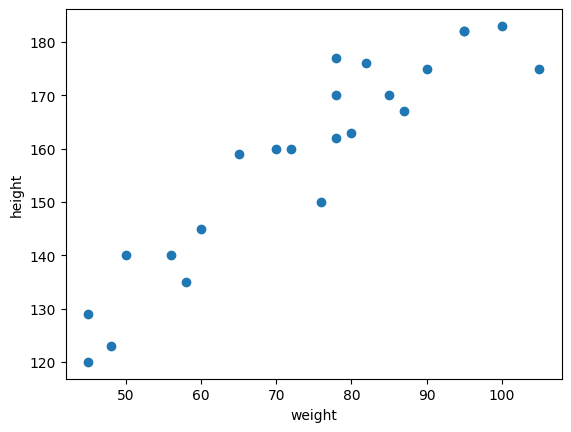

In [3]:
plt.scatter(x="Weight",y="Height",data=df)
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [4]:
# divided the our dataset into independent and dependent features
x=df[["Weight"]]
y=df["Height"]
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
x.shape

(23, 1)

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
x_train.head()

,Weight
16,50
3,60
12,105
9,78
4,70


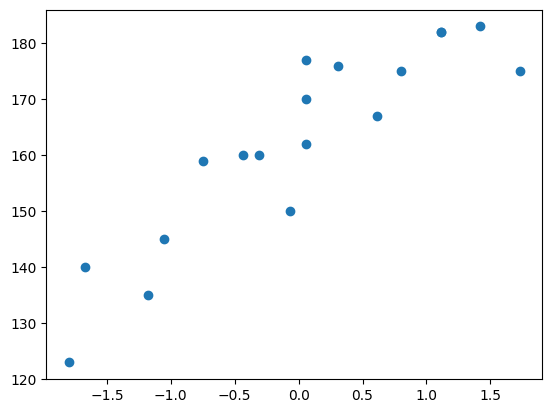

In [9]:
#standaridize the dataset train data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
plt.scatter(x_train,y_train)
plt.show()

In [10]:
# train the simple linear regression task
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [11]:
print("slope or coefficient of weight",regression.coef_)
print("intercept:",regression.intercept_)

slope or coefficient of weight [15.39973275]
intercept: 162.27777777777777


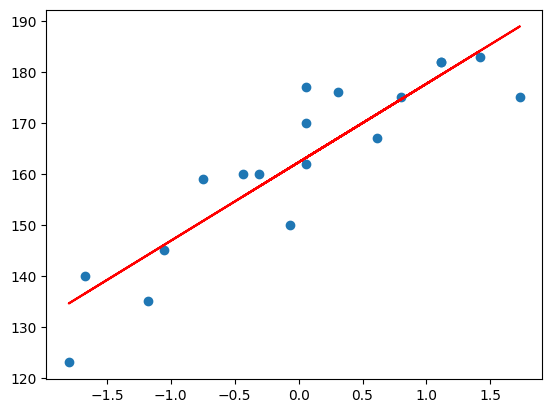

In [12]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),'r')
plt.show()

# #prediction of training data
# 1.predicted heiht output=intercept +coef_(Weights)
# 2.y_pred_train=162.77777+15.39973275(x_train)
  

# # prediction of test data
# 1.predicted height output=intercept_+coef_(weight)
# 2.y_pred_test=162.77777+15.39973275(x_test)

In [13]:
y_pred_test=regression.predict(x_test)
y_pred_test,y_test

(array([131.718363  , 131.718363  , 142.20495594, 165.08479508,
        169.85142823]),
 20    129
 0     120
 21    140
 6     163
 14    170
 Name: Height, dtype: int64)

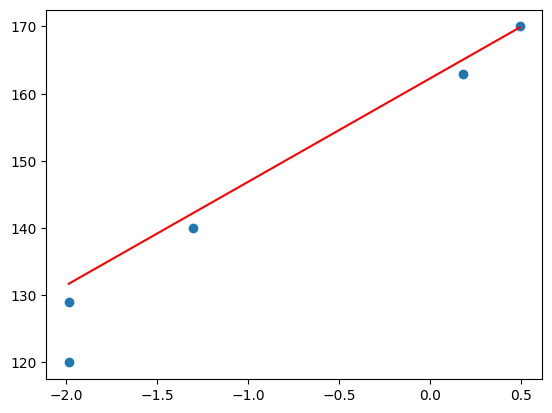

In [14]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test),'r')
plt.show()

# performance matrics
# mse,mae,rmse
# r square and adjusted r square


In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

30.787960729894365
3.775009758116977
5.548690001243029


r square
formula
r^2=1-SSR/SST
r2=coefficient of determination SSR=sum of squares of residuals SST=total sum of squares


In [16]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.9169329788207037

#  adjusted r square score
#   formula
#   adjusted r2=1-[(1-r2)*(n-1)/(n-k-1)]
#  where:
# r2: the r2 of the model 
#  n:the number of observations 
#  k:the number of predictor variables 

In [18]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8892439717609383

In [19]:
regression

LinearRegression()

In [20]:
# new data point weight is 80
scaled_weight=scaler.transform([[80],[70]])
scaled_weight

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.18227701],
       [-0.436777  ]])

In [21]:
print("height prediction for 80 kg,70kg  is",regression.predict([scaled_weight[0],scaled_weight[1]]))

height prediction for 80 kg,70kg  is [165.08479508 155.55152877]


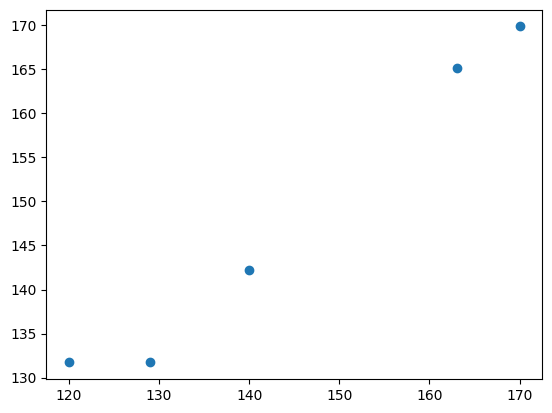

In [22]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [23]:
# residuals
residuals=y_test-y_pred_test
residuals

20    -2.718363
0    -11.718363
21    -2.204956
6     -2.084795
14     0.148572
Name: Height, dtype: float64

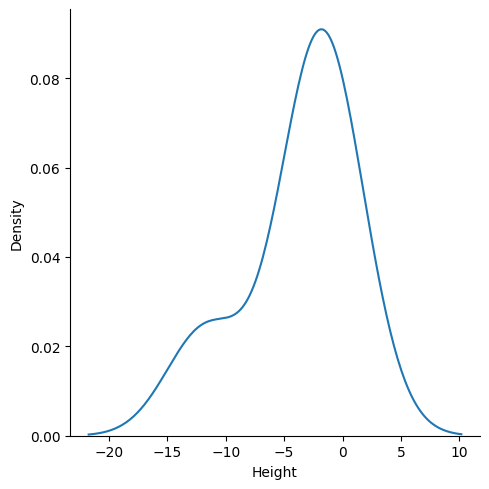

In [24]:
# plot the residuals
sns.displot(residuals,kind="kde")

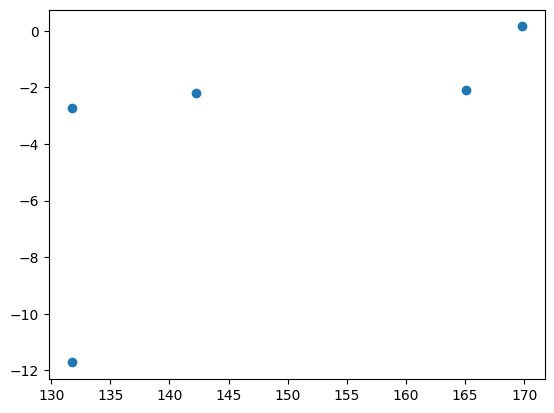

In [25]:
# scatter plot with respect to prediction and residuals..
# it should be uniformly distributed(means both negitive and positive values) around 0(residusls)
plt.scatter(y_pred_test,residuals)